In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

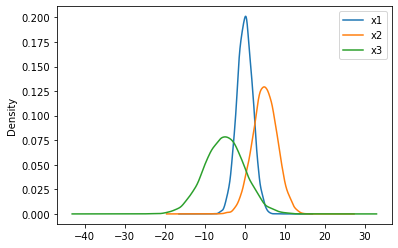

In [60]:
df.plot.kde()

In [61]:
standardscaler = StandardScaler()

In [62]:
data_tf = standardscaler.fit_transform(df)

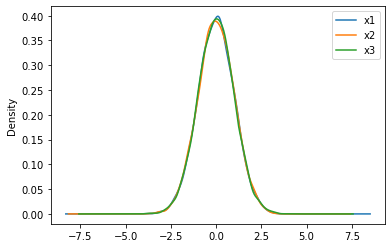

In [63]:
df_tf = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df_tf.plot.kde()

In [64]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

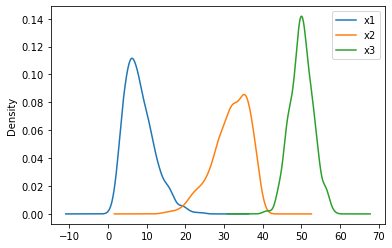

In [65]:
df.plot.kde()

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

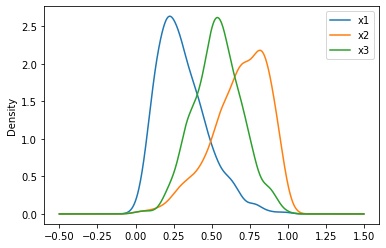

In [68]:
df_tf = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df_tf.plot.kde()

In [69]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

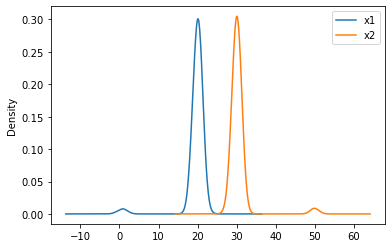

In [70]:
df.plot.kde()

In [71]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [72]:
data_tf = robustscaler.fit_transform(df)
df_tf = pd.DataFrame(data_tf, columns=['x1','x2'])

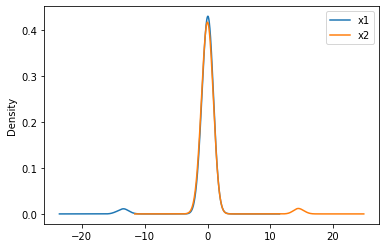

In [73]:
df_tf.plot.kde()

In [74]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

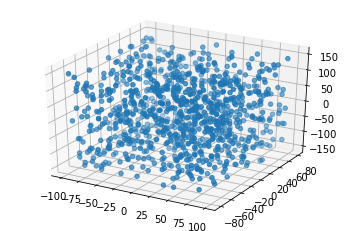

In [75]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [76]:
from sklearn.preprocessing import Normalizer

In [77]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [78]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

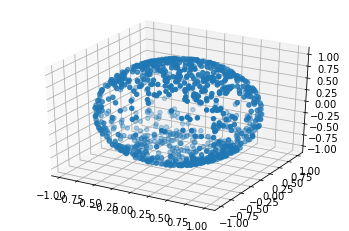

In [79]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [80]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [81]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [82]:
data_tf = binarizer.fit_transform(X)
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [83]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()

In [86]:
le.fit_transform(df.Income)

array([1, 1, 0, 2, 2, 0])

In [87]:
from sklearn.preprocessing import LabelBinarizer

In [88]:
lb = LabelBinarizer()

In [89]:
lb.fit_transform(df.Income)

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [90]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High'],
    'Location':['Delhi','Mumbai','Bangalore','Kolkata','Chennai','Mumbai']})

In [91]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
ohe = OneHotEncoder()

In [93]:
df_tf = ohe.fit_transform(df[['Income','Location']])

In [94]:
df_tf.toarray()  # first 3 cols corresponds to high,low,medium of Income, next 5 cols corresponds to unique values of location

array([[0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.]])

In [105]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,],
    'B':[3,4,1,np.nan,4,]
})
df

,A,B
0,1.0,3.0
1,2.0,4.0
2,3.0,1.0
3,4.0,NaN
4,NaN,4.0


In [97]:
from sklearn.impute import SimpleImputer

In [100]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : number, string, np.nan (default) or None
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      should be set to `np.nan`, since `pd.NA` will be converted to `np.nan`.
 |  
 |  strategy : string, default='mean'
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using th

In [106]:
imp = SimpleImputer(strategy='mean', missing_values=np.nan)

In [107]:
imp.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3. ],
       [2.5, 4. ]])

In [108]:
from sklearn.preprocessing import FunctionTransformer

In [109]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [110]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [111]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [112]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


In [129]:
df = pd.DataFrame({'Text':[
    'Hello How are you',
    'Great stuff buddy',
    'How are things',
    'Awesome stuff Awesome'
],'Info':[11,22,44,21]})
df

,Text,Info
0,Hello How are you,11
1,Great stuff buddy,22
2,How are things,44
3,Awesome stuff Awesome,21


In [130]:
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
cv = CountVectorizer()

In [132]:
cv.fit_transform(df.Text).toarray()

array([[1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 2, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [133]:
cv.vocabulary_

{'hello': 4,
 'how': 5,
 'are': 0,
 'you': 8,
 'great': 3,
 'stuff': 6,
 'buddy': 2,
 'things': 7,
 'awesome': 1}

In [125]:
cv.transform(['you are great']).toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [126]:
cv = CountVectorizer(stop_words=['are'])

In [127]:
cv.fit(df.Text)

CountVectorizer(stop_words=['are'])

In [128]:
cv.vocabulary_

{'hello': 3,
 'how': 4,
 'you': 7,
 'great': 2,
 'stuff': 5,
 'buddy': 1,
 'things': 6,
 'awesome': 0}

In [134]:
cv = CountVectorizer(stop_words='english')

In [135]:
cv.fit(df.Text)
cv.vocabulary_  #removed how and are

{'hello': 3, 'great': 2, 'stuff': 4, 'buddy': 1, 'things': 5, 'awesome': 0}

In [136]:
cv = CountVectorizer(vocabulary=['great','buddy','awesome'])

In [137]:
cv.fit(df.Text)
cv.vocabulary_  #gets only required/important words

{'great': 0, 'buddy': 1, 'awesome': 2}

In [142]:
cv = CountVectorizer(ngram_range= [1,2],stop_words='english')
cv.fit(df.Text)
cv.vocabulary_ 

{'hello': 5,
 'great': 3,
 'stuff': 6,
 'buddy': 2,
 'great stuff': 4,
 'stuff buddy': 8,
 'things': 9,
 'awesome': 0,
 'awesome stuff': 1,
 'stuff awesome': 7}

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [144]:
tfidf = TfidfVectorizer(stop_words='english')

In [148]:
df = pd.DataFrame({'Text':[
    'Hello How are you',
    'Great stuff buddy',
    'How are things',
    'Awesome stuff Awesome'
],'Info':[11,22,44,21]})

In [157]:
tfidf.fit_transform(df.Text).toarray()

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.61761437, 0.61761437, 0.        , 0.48693426,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.93032387, 0.        , 0.        , 0.        , 0.36673901,
        0.        ]])

In [152]:
tfidf.vocabulary_

{'hello': 3, 'great': 2, 'stuff': 4, 'buddy': 1, 'things': 5, 'awesome': 0}

In [153]:
from sklearn.feature_extraction.text import HashingVectorizer

In [154]:
hv = HashingVectorizer(n_features=4)

In [156]:
hv.fit_transform(df.Text).toarray()

array([[ 0.81649658, -0.40824829,  0.        ,  0.40824829],
       [ 0.57735027, -0.57735027,  0.57735027,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.4472136 ,  0.        ,  0.89442719]])